In [119]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import sys
sys.path.append('../src/')
import clustering

In [121]:
iris = load_iris()
X = iris.data # Numpy array
df_X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

In [122]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [123]:
cluster = KMeans(n_clusters=3, n_init=1, init='random')

In [124]:
isinstance(df_X, pd.DataFrame)

True

In [125]:
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [126]:
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [127]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [149]:
cluster.

AttributeError: 'KMeans' object has no attribute 'X'

In [133]:
clusters = [int(n) for n in range(1, 32)]
means = []

In [147]:
for c in clusters:
    cluster = KMeans(n_clusters=c)
    cluster.fit(X)
    lab = cluster.labels_
    cent = cluster.cluster_centers_
    print(clustering.get_distances(df=df_X, cluster=cluster))
    #means.append(clustering.compute_distortion(df_c))

[2.7032072309265036, 2.72983442721349, 2.8927488656985076, 2.764946533539724, 2.750368944947811, 2.4043563241194787, 2.83412467380436, 2.6317033774091385, 2.9439422548684613, 2.6830572114660542, 2.589748250313146, 2.619464830838544, 2.8036635556595115, 3.264760736511432, 2.9038817698613926, 2.749690164363978, 2.754510724853569, 2.667857317524059, 2.369865537676487, 2.647916665355363, 2.355418434164087, 2.5890273591962423, 3.231964727530299, 2.3099486285774122, 2.378401984526586, 2.523911514560947, 2.474778643299908, 2.5897997348572472, 2.662729677104556, 2.6425737454232, 2.5973055268874323, 2.459972086562501, 2.7943030138718554, 2.8253134339396757, 2.6436583238636064, 2.8763859268185836, 2.711874382538149, 2.820117491642266, 3.0210808220458674, 2.6013834780746956, 2.7852700647034814, 3.037871403905483, 3.023904099008433, 2.4337890897391525, 2.279297260122076, 2.7314457710157822, 2.5999479481969123, 2.8504495551871587, 2.6087281703287273, 2.7071995370369977, 1.5119069636279427, 0.985492

[autoreload of clustering failed: Traceback (most recent call last):
  File "/Users/kpak/opt/anaconda3/envs/kai/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/kpak/opt/anaconda3/envs/kai/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/kpak/opt/anaconda3/envs/kai/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/kpak/opt/anaconda3/envs/kai/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../src/clustering.py", line 41, in <module>
    metric: str='Euclidean') -> pd.DataFrame:
NameError: name 'sklearn' is not d

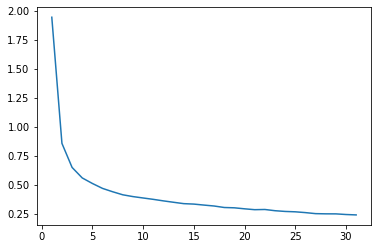

In [143]:
sns.lineplot(clusters, means)

In [136]:
df_X.loc[0, :]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

In [150]:
clustering.eval_KMeans(df_X, df_X.columns, 1, 10)